In [35]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv('./prepared_data/for_using_LANL-CM5-1994-4.1-cln.csv', index_col=0)

In [37]:
data.head()

,wait_time,req_procs,req_memory,req_time,active_jobs_count,total_used_procs,mean_used_procs,total_used_memory,mean_used_memory,queued_jobs_count,...,min_wait_time_completed,mean_run_time_completed,max_run_time_completed,min_run_time_completed,mean_procs_completed,max_procs_completed,min_procs_completed,mean_memory_completed,max_memory_completed,min_memory_completed
1,5.0,32.0,1024.0,900.0,0.0,0.0,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,128.0,3200.0,3600.0,0.0,0.0,NaN,0.0,NaN,1.0,...,5.0,3362.0,3362.0,3362.0,32.0,32.0,32.0,988.0,988.0,988.0
5,5.0,32.0,1024.0,300.0,1.0,128.0,128.0,1812.0,1812.000000,1.0,...,5.0,3362.0,3362.0,3362.0,32.0,32.0,32.0,988.0,988.0,988.0
6,15.0,32.0,6400.0,300.0,2.0,160.0,80.0,2816.0,1408.000000,1.0,...,5.0,3362.0,3362.0,3362.0,32.0,32.0,32.0,988.0,988.0,988.0
7,5.0,32.0,3840.0,3300.0,3.0,192.0,64.0,9224.0,3074.666667,1.0,...,5.0,3362.0,3362.0,3362.0,32.0,32.0,32.0,988.0,988.0,988.0


In [38]:
data = data.fillna(data.mean(axis=0))

In [39]:
data.head()

,wait_time,req_procs,req_memory,req_time,active_jobs_count,total_used_procs,mean_used_procs,total_used_memory,mean_used_memory,queued_jobs_count,...,min_wait_time_completed,mean_run_time_completed,max_run_time_completed,min_run_time_completed,mean_procs_completed,max_procs_completed,min_procs_completed,mean_memory_completed,max_memory_completed,min_memory_completed
1,5.0,32.0,1024.0,900.0,0.0,0.0,67.410703,0.0,4472.301422,1.0,...,122.824534,1961.537236,7018.201236,423.871521,55.527276,106.187706,34.845618,4295.918397,9623.161702,1702.653936
4,7.0,128.0,3200.0,3600.0,0.0,0.0,67.410703,0.0,4472.301422,1.0,...,5.000000,3362.000000,3362.000000,3362.000000,32.000000,32.000000,32.000000,988.000000,988.000000,988.000000
5,5.0,32.0,1024.0,300.0,1.0,128.0,128.000000,1812.0,1812.000000,1.0,...,5.000000,3362.000000,3362.000000,3362.000000,32.000000,32.000000,32.000000,988.000000,988.000000,988.000000
6,15.0,32.0,6400.0,300.0,2.0,160.0,80.000000,2816.0,1408.000000,1.0,...,5.000000,3362.000000,3362.000000,3362.000000,32.000000,32.000000,32.000000,988.000000,988.000000,988.000000
7,5.0,32.0,3840.0,3300.0,3.0,192.0,64.000000,9224.0,3074.666667,1.0,...,5.000000,3362.000000,3362.000000,3362.000000,32.000000,32.000000,32.000000,988.000000,988.000000,988.000000


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import math


In [41]:
X = data.drop(['wait_time'], axis=1)
y = data['wait_time']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Метрики

In [43]:
from sklearn.metrics import mean_squared_error,\
                            r2_score as R2, \
                            mean_absolute_percentage_error as MAPE

def RMSE(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

In [44]:
results = []
def eval_model(model_info, y_true, y_pred):
    result = {
        'model': model_info,
        'RMSE': RMSE(y_true, y_pred),
        'R2': R2(y_true, y_pred),
        'MAPE': MAPE(y_true, y_pred)
    }
    results.append(result)
    return result

### Для начала обучим простой оценкой средним по тренировочной выборке

In [45]:
y_pred = np.ones_like(y_test) * y_train.mean()

In [46]:
eval_model("Average train value", y_test, y_pred)

{'model': 'Average train value',
 'RMSE': 11178.803784040037,
 'R2': -5.089835015659183e-05,
 'MAPE': 251129962790724.62}

### Оценка медианой

In [47]:
y_pred = np.ones_like(y_test) * y_train.median()

In [48]:
eval_model("Average train value", y_test, y_pred)

{'model': 'Average train value',
 'RMSE': 11206.50392839797,
 'R2': -0.00501312433731349,
 'MAPE': 703714930641.6194}

###  Простая линейная регрессия

In [49]:
# Нормализуем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, TimeSeriesSplit



def find_best_model(model, grid_space, X, y):
    kf = TimeSeriesSplit(n_splits=5) # Тут вопрос, надо ли так делать (shuffle)
    grid = GridSearchCV(model, param_grid=grid_space, cv=kf, scoring='neg_mean_squared_error', verbose=1)
    # return grid
    model_grid = grid.fit(X,y)
    return model_grid.best_estimator_

In [59]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

for model in [Lasso(), Ridge(), ElasticNet()]:
    grid_space = {
        'alpha': np.logspace(-5, 0, 5),
        'max_iter': [10000]
    }
    best_model = find_best_model(model, grid_space, X_train, y_train)
    
    best_model.fit(X_train, y_train)
    
    print(eval_model(f"{best_model}", y_test, best_model.predict(X_test)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'model': 'Lasso(max_iter=10000)', 'RMSE': 9117.563861362763, 'R2': 0.33474359349647476, 'MAPE': 2.4722335027241786e+17}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'model': 'Ridge(max_iter=10000)', 'RMSE': 9117.78334995479, 'R2': 0.33471156346043507, 'MAPE': 2.4722810444039597e+17}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'model': 'ElasticNet(alpha=0.0031622776601683794, max_iter=10000)', 'RMSE': 9104.749324046099, 'R2': 0.3366122861336658, 'MAPE': 2.468487239387662e+17}


### KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
model = KNeighborsRegressor()

grid_space = {
    'n_neighbors': [1, 3], 
    'weights' : ['uniform', 'distance']
}

best_model = find_best_model(model, grid_space, X_train, y_train)
    
best_model.fit(X_train, y_train)

print(eval_model(f"{best_model}", y_test, best_model.predict(X_test)))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'model': "KNeighborsRegressor(n_neighbors=3, weights='distance')", 'RMSE': 6575.988229807597, 'R2': 0.6539383356247326, 'MAPE': 1.149752472777493e+17}


### Decision tree regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
model = DecisionTreeRegressor()

grid_space = {
    'max_features': ['log2', 'sqrt'],
    'max_depth': np.arange(10, 150, 10)
}

best_model = find_best_model(model, grid_space, X_train, y_train)
    
best_model.fit(X_train, y_train)

print(eval_model(f"{best_model}", y_test, best_model.predict(X_test)))

Fitting 3 folds for each of 28 candidates, totalling 84 fits
{'model': "DecisionTreeRegressor(max_depth=20, max_features='log2')", 'RMSE': 10754.340123222953, 'R2': 0.07445194390743648, 'MAPE': 1.6282468100807928e+16}


### Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model = RandomForestRegressor()

grid_space = {'bootstrap': [True, False],
    'max_depth': [5],
    # 'min_samples_leaf': [1, 2, 4],
    # 'min_samples_split': [2, 5, 10],
    'n_estimators': [500]
}

# grid_space = {'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [200]
# }

best_model = find_best_model(model, grid_space, X_train, y_train)
    
best_model.fit(X_train, y_train)

print(eval_model(f"{best_model}", y_test, best_model.predict(X_test)))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyboardInterrupt: 

### Boosting

##### Catboost

In [ ]:
from catboost import CatBoostRegressor

In [69]:
model = CatBoostRegressor()

grid_space = {'n_estimators': [300], 
          'max_depth': [ 8],
          'random_state': [777],
          'verbose': [False]
}


best_model = find_best_model(model, grid_space, X_train, y_train)
    
best_model.fit(X_train, y_train)

print(eval_model(f"{best_model}", y_test, best_model.predict(X_test)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model': '<catboost.core.CatBoostRegressor object at 0x7f615d727be0>', 'RMSE': 5258.232055062583, 'R2': 0.7787359107144416, 'MAPE': 2.645423196120238e+16}


In [ ]:
model.

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [75]:
values = [x['R2'] for x in results]
models = [str(x['model']) for x in results]
print(models, values)


['Average train value', 'Average train value', 'Lasso(max_iter=10000)', 'Ridge(max_iter=10000)', 'ElasticNet(alpha=0.0031622776601683794, max_iter=10000)', "KNeighborsRegressor(n_neighbors=3, weights='distance')", "DecisionTreeRegressor(max_depth=20, max_features='log2')", 'Lasso(max_iter=10000)', 'Ridge(max_iter=10000)', 'ElasticNet(alpha=0.0031622776601683794, max_iter=10000)', "KNeighborsRegressor(n_neighbors=3, weights='distance')", '<catboost.core.CatBoostRegressor object at 0x7f615d727be0>'] [-5.089835015659183e-05, -0.00501312433731349, 0.33474359349647476, 0.33471156346043507, 0.3366122861336658, 0.6539383356247326, 0.07445194390743648, 0.33474359349647476, 0.33471156346043507, 0.3366122861336658, 0.6539383356247326, 0.7787359107144416]


In [76]:
import matplotlib.pyplot as plt



In [78]:
results

[{'model': 'Average train value',
  'RMSE': 11178.803784040037,
  'R2': -5.089835015659183e-05,
  'MAPE': 251129962790724.62},
 {'model': 'Average train value',
  'RMSE': 11206.50392839797,
  'R2': -0.00501312433731349,
  'MAPE': 703714930641.6194},
 {'model': 'Lasso(max_iter=10000)',
  'RMSE': 9117.563861362763,
  'R2': 0.33474359349647476,
  'MAPE': 2.4722335027241786e+17},
 {'model': 'Ridge(max_iter=10000)',
  'RMSE': 9117.78334995479,
  'R2': 0.33471156346043507,
  'MAPE': 2.4722810444039597e+17},
 {'model': 'ElasticNet(alpha=0.0031622776601683794, max_iter=10000)',
  'RMSE': 9104.749324046099,
  'R2': 0.3366122861336658,
  'MAPE': 2.468487239387662e+17},
 {'model': "KNeighborsRegressor(n_neighbors=3, weights='distance')",
  'RMSE': 6575.988229807597,
  'R2': 0.6539383356247326,
  'MAPE': 1.149752472777493e+17},
 {'model': "DecisionTreeRegressor(max_depth=20, max_features='log2')",
  'RMSE': 10754.340123222953,
  'R2': 0.07445194390743648,
  'MAPE': 1.6282468100807928e+16},
 {'mode

<BarContainer object of 12 artists>

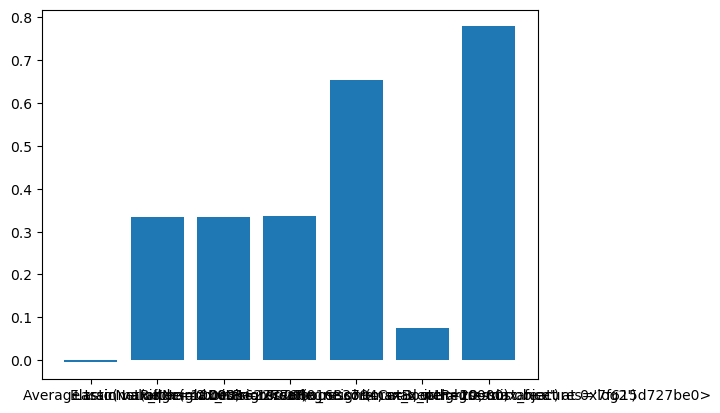

In [80]:
plt.bar(models, values)